In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
# importation du jeu de donées des profils 
df = pd.read_csv("./projet/labels/labels.csv")

Effectuons une première ACP en gardant tous les composants 

In [3]:
# récupération des données pour l'ACP
X = df.iloc[:,1:].astype(float)
pca = PCA()
pca.fit(X)

PCA()

Affichage et représentation des valeurs propres de cette première ACP afin de déterminer les composants à retenir

Proportion de variances expliquées:
[4.47360460e-01 2.91622255e-01 2.41918291e-01 9.01947678e-03
 8.56311105e-03 8.97593000e-04 3.04389220e-04 1.97325643e-04
 1.17053829e-04 4.53215683e-08 1.45289513e-16 5.63634850e-17
 9.13858099e-42 3.28743536e-50]


Text(0.5, 1.0, 'valeurs propres cumulées')

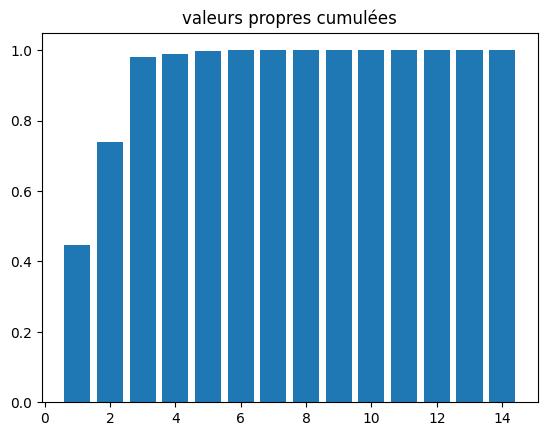

In [4]:
print("Proportion de variances expliquées:")
print(pca.explained_variance_ratio_)

eigenvalues = pca.explained_variance_
eigenvaluesRatio = np.cumsum(pca.explained_variance_ratio_)
plt.bar(np.arange(1, len(eigenvalues) + 1), eigenvaluesRatio)
plt.title("valeurs propres cumulées")

Constatons que pour les trois premiers facteurs dont la somme des variances expliquées atteint plus que 95%. Nous gardons ainsi 3 composants principaux pour une analyse plus optimale et pertinente.
Nous refaisons l'ACP en gardant les 3 premières composants principaux.

In [5]:
pca = PCA(n_components=3)
coord = pca.fit_transform(X)

Puis nous importons les étiquettes obtenues manuellement de 3000 premières lignes

In [55]:
dy1= pd.read_csv("./projet/labels/labels 0 - 1000.csv")
dy2 = pd.read_excel('./projet/labels/labels1000-2000.xlsx')
dy3 = pd.read_csv("./projet/labels/label2001-3000.csv")
d1  = dy1.iloc[:1001, -1]
d2 = dy2.iloc[:, -1]
d3 = dy3.iloc[:1001, -1]
y = pd.concat([d1, d2, d3], ignore_index= True)
print(len(y))
# vérification des étiquettes manquantes
print("Est-ce qu'il existe des étiquettes manquantes? :")
#print(np.any(np.isnan(y)))

3000
Est-ce qu'il existe des étiquettes manquantes? :


Nous créons les coordonnées des 3000 premières lignes pour la classification

In [57]:
data = pd.DataFrame(coord, columns=["Composant1", "Composant2","Composant3"])
X = data.iloc[:3000,:]
data.head(5)

,Composant1,Composant2,Composant3
0,4.524848,2.160804,-0.040415
1,29.748653,-6.223518,-0.025110
2,-78.054328,0.331477,-0.118549
3,-21.096676,-2.236094,-0.068227
4,30.962986,-3.127702,-0.021192


In [58]:
# récupération des datasets et des étiquettes à entrainer, ainsi que ceux de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None)

In [59]:
# transformation en type dataframe
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

Et puis nous effectuons la classification SVM après l'ACP

In [60]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instancier le classifier avec default hyperparameters
svc=SVC() 

# fit classifier to training set
svc.fit(X_train,y_train)

# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9044


In [64]:
X_to_classify = data.iloc[3000:,:]
y_to_predict = svc.predict(X_to_classify)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- label


In [62]:
data_classified = pd.DataFrame(data, columns=X.columns)
y_total = np.hstack([y_train, y_test, y_to_predict])
data_classified["label"] = y_total

print("Profils classifiés:")
print(data_classified.head(5))
print(f"Nombre de profils atypes: ", len(np.where(data_classified["label"]==-1)[0]))
print(f"Nombre de profils normals: ", len(np.where(data_classified["label"]==1)[0]))

Profils classifiés:
   Composant1  Composant2  Composant3  label
0    4.524848    2.160804   -0.040415    1.0
1   29.748653   -6.223518   -0.025110    1.0
2  -78.054328    0.331477   -0.118549    1.0
3  -21.096676   -2.236094   -0.068227    1.0
4   30.962986   -3.127702   -0.021192    1.0
Nombre de profils atypes:  24307
Nombre de profils normals:  1819132


Nous allons visualiser les données obtenues ci-dessus

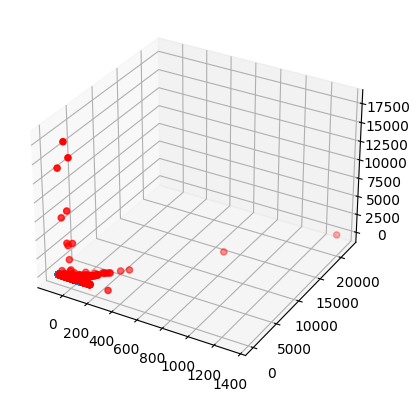

In [73]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_classified[data_classified["label"] == -1]['Composant1'], data_classified[data_classified["label"] == -1]['Composant2'], data_classified[data_classified["label"] == -1]['Composant3'], color='red')
ax.scatter(data_classified[data_classified["label"] == 1]['Composant1'], data_classified[data_classified["label"] == 1]['Composant2'], data_classified[data_classified["label"] == 1]['Composant3'])
plt.show()

Voyons que les données ne sont pas bien représentées: les profils atypiques sont dominant à la place des profils normals.

Nous refaisons la représentation en se consentrant sur les 100 miles premières lignes.

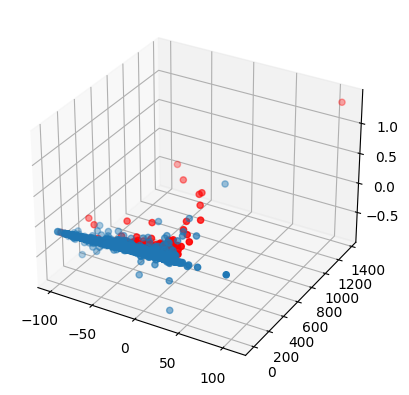

In [76]:
fig = plt.figure()
ax = plt.axes(projection='3d')
test = data_classified.iloc[:10001,:]
ax.scatter(test[test["label"] == 1]['Composant1'], test[test["label"] == 1]['Composant2'], test[test["label"] == 1]['Composant3'])
ax.scatter(test[test["label"] == -1]['Composant1'], test[test["label"] == -1]['Composant2'], test[test["label"] == -1]['Composant3'], color='red')
plt.show()
